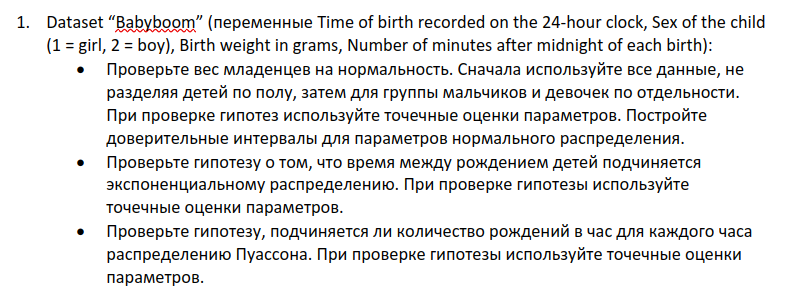

In [61]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st

cols = ['Time of birth', 'Sex', 'weight', 'Minutes after midnight']
df = pd.read_fwf('datasets/babyboom.dat.txt', header=None, widths=[8, 11, 8, 8], names=cols)

df.head()

,Time of birth,Sex,weight,Minutes after midnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


## Проверка веса на нормальность

In [46]:
dfd = df.loc[(df['Sex'] == 1)]
dfm = df.loc[(df['Sex'] == 2)]

dfs = [df['weight'], dfd['weight'], dfm['weight'], df['weight'], dfd['weight'], dfm['weight']]
titles = ['All hist', 'Girls hist', 'Boys hist', '', '', '']

#### Графики

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


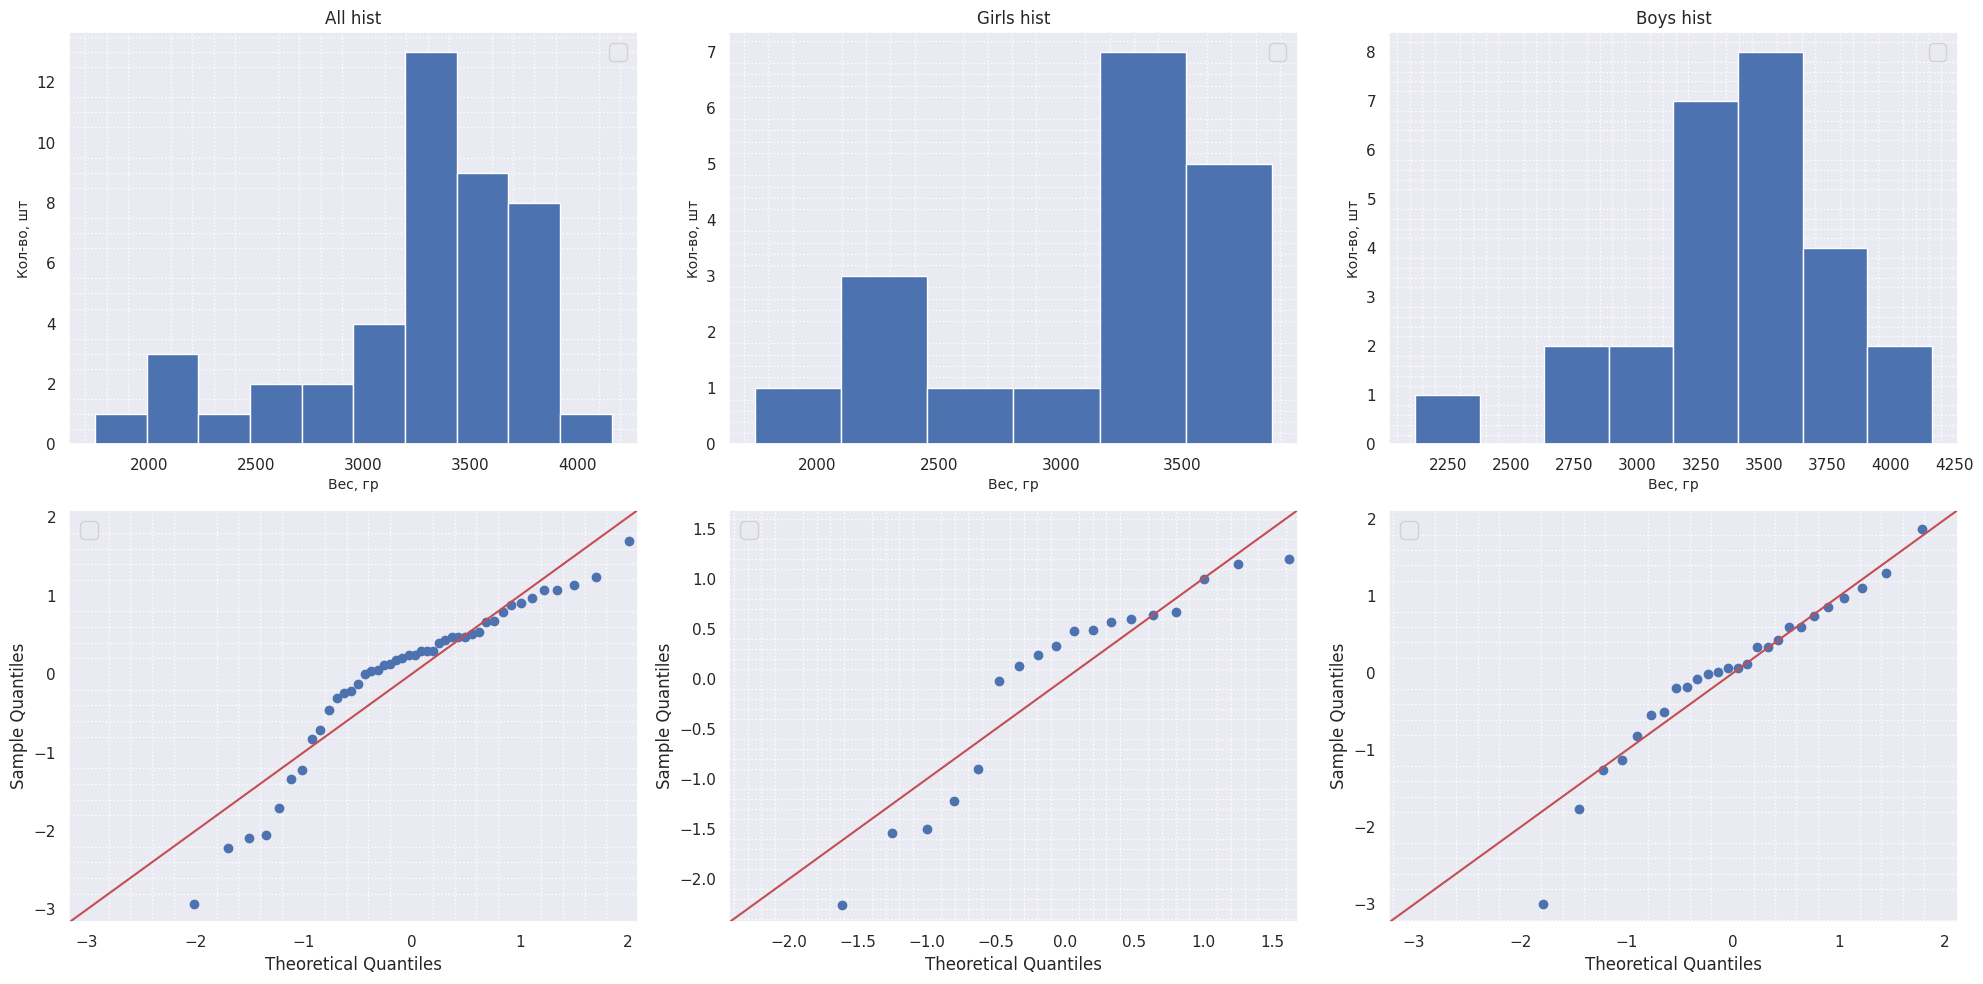

In [47]:
def pl(c, ax):
    ax.hist(x=dfs[c], bins='auto');
    ax.set_xlabel(r'Вес, гр', fontsize=10)
    ax.set_ylabel(r'Кол-во, шт', fontsize=10)
    ax.set_title(titles[c])

def pl2(ax, c):
    sm.qqplot(st.zscore(dfs[c]), line='45', ax=ax)
    ax.set_title(titles[c])

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
c = 0

for idx, row in enumerate(axes):
    for jdx, ax in enumerate(row):
        if c < 3:
            pl(c, ax)
        else:
            pl2(ax, c)
        c+=1
        
        ax.minorticks_on()
        ax.legend(fontsize=16)
        ax.grid(which='major')
        ax.grid(which='minor', linestyle=':')

fig.tight_layout()
plt.show()

сравниваем эмпирические и теоритические квантили



#####  Критерий Колмогорова
![Alt text](imgs/image-3.png)

In [48]:
print(sm.stats.diagnostic.lilliefors(df['weight'], dist='norm', pvalmethod='table'))
print("М", sm.stats.diagnostic.lilliefors(dfm['weight'], dist='norm', pvalmethod='table'))
print("Ж", sm.stats.diagnostic.lilliefors(dfd['weight'], dist='norm', pvalmethod='table'))

(0.18336357215784677, 0.0009999999999998899)
М (0.15544307065675722, 0.1059581856011847)
Ж (0.21427812399671214, 0.02846526863248284)


(D, p)

D - Статистика теста Колмогорова-Смирнова с расчетным средним значением и дисперсией.

Значение p ниже уровня значимости критерия 0,05, нулевую гипотезу о том, что выборка извлечена из нормальной генеральной совокупности **не принимаем**.

##### Критерий Андерсона-Дарлина
![Alt text](imgs/image-4.png)

In [49]:
print(sm.stats.diagnostic.normal_ad(df['weight']))
print("М", sm.stats.diagnostic.normal_ad(dfm['weight']))
print("Ж", sm.stats.diagnostic.normal_ad(dfd['weight']))

(1.7168461277690383, 0.00017877240330711942)
М (0.47246625627482786, 0.22375107839639316)
Ж (1.0265607371000236, 0.007984332705229509)


##### Критерий Крамера-фон-Мизеса
![Alt text](imgs/image-5.png)

In [50]:
print(st.kstest(df['weight'], st.norm.cdf))
print("M", st.kstest(dfm['weight'], st.norm.cdf))
print("Ж", st.kstest(dfd['weight'], st.norm.cdf))

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1745, statistic_sign=-1)
M KstestResult(statistic=1.0, pvalue=0.0, statistic_location=2121, statistic_sign=-1)
Ж KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1745, statistic_sign=-1)


#### Критерий Шапиро-Уилка
![Alt text](imgs/image-7.png)

In [51]:
print(st.shapiro(df['weight']))
print('М', st.shapiro(dfm['weight']))
print('Ж', st.shapiro(dfd['weight']))

ShapiroResult(statistic=0.8987231254577637, pvalue=0.0009944075718522072)
М ShapiroResult(statistic=0.9474740624427795, pvalue=0.20224997401237488)
Ж ShapiroResult(statistic=0.8702831268310547, pvalue=0.017984924837946892)


#### Критерий Харке–Бера
![Alt text](imgs/image-8.png)

In [52]:
print(st.jarque_bera(df['weight']))
print('М', st.jarque_bera(dfm['weight']))
print('Ж', st.jarque_bera(dfd['weight']))

SignificanceResult(statistic=10.351560931737778, pvalue=0.005651804151933801)
М SignificanceResult(statistic=5.570161003315512, pvalue=0.061724119936972875)
Ж SignificanceResult(statistic=2.477896004137788, pvalue=0.28968880972449024)


### Доверительные интервалы для парметров нормального распределения

Существует вероятность 95%, что доверительный интервал содержит истинный средний вес детей

In [53]:
print(st.norm.interval(0.95, loc=np.mean(df['weight']), scale=st.sem(df['weight'])))
print("M", st.norm.interval(0.95, loc=np.mean(dfm['weight']), scale=st.sem(dfm['weight'])))
print("Ж", st.norm.interval(0.95, loc=np.mean(dfd['weight']), scale=st.sem(dfd['weight'])))

(3119.9337914896673, 3431.9752994194237)
M (3210.7751109157757, 3539.840273699609)
Ж (2840.6735615476045, 3424.215327341284)


###

## Проверка гипотезы о том, что время между рождением детей подчиняется экспоненциальному распределению

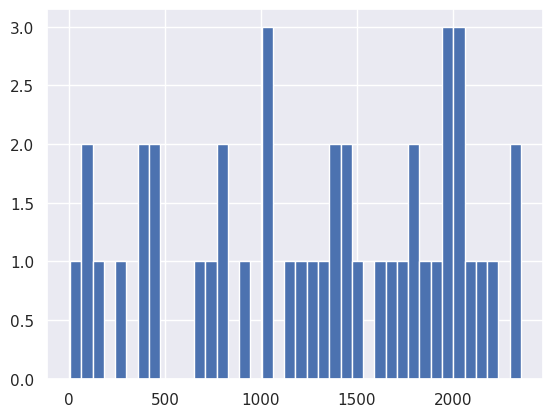

In [54]:
plt.hist(x=df['Time of birth'], bins=40);

##### Двувыборочный критерий Колмогорова-Смирнова
![Alt text](imgs/image-6.png)

##### chi^2 (Хи-квадрат)

In [55]:
st.chisquare(df['Time of birth'])

Power_divergenceResult(statistic=15828.80401234568, pvalue=0.0)

#
#
#
## Количество рождения в час для каждого часа - распределение Пауссона
![Alt text](imgs/image-11.png)

In [64]:
intervals = []
mins = 0
for i in range(24):
    intervals.append(mins)
    mins += 60

hour = []
for i in df['Minutes after midnight']:
    for j in range(1, len(intervals)):
        if i >= intervals[j-1] and i<intervals[j]:
            hour.append(j)
            break
hour.append(24)
hour.append(24)
df.insert(loc= 0 , column=f'h', value=hour)

df.head()

,h,Time of birth,Sex,weight,Minutes after midnight
0,1,5,1,3837,5
1,2,104,1,3334,64
2,2,118,2,3554,78
3,2,155,2,3838,115
4,3,257,2,3625,177


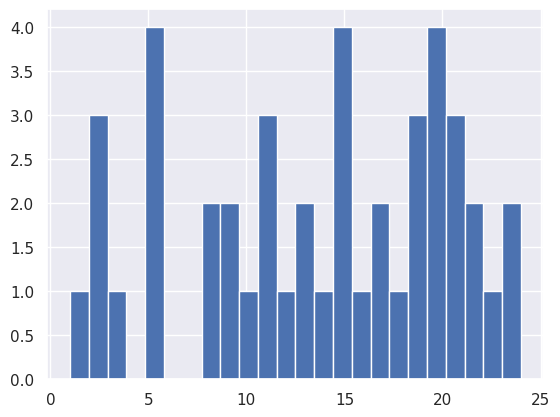

In [68]:
plt.hist(x=df['h'], bins=24);

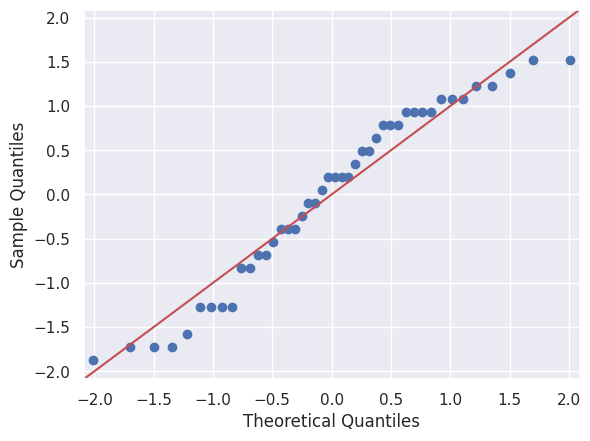

In [67]:
sm.qqplot(st.zscore(df['h']), line='45')
plt.show()

In [62]:
'''
pois = st.poisson.rvs(mu=12, size=44)
print(pois)
plt.hist(x=pois, bins=24);
'''

'\npois = st.poisson.rvs(mu=12, size=44)\nprint(pois)\nplt.hist(x=pois, bins=24);\n'

In [59]:
st.chisquare(df['h'])

Power_divergenceResult(statistic=148.3388704318937, pvalue=1.663984635566369e-13)